In [104]:
import json


file = "data/list-of-cards.json" 

with open(file, 'r') as f:
    data = json.load(f)

for element in data:
    print(element['name'])
    print("meaning:", ", ".join(element['meaning']))
    print("reversed:", ", ".join(element['reversed_meaning']))
    print()

The Fool
meaning: new beginnings, innocence, spontaneity
reversed: foolishness, recklessness, lack of direction

The Magician
meaning: manifestation, skill, power
reversed: trickery, manipulation, lack of control

The High Priestess
meaning: intuition, mystery, subconscious
reversed: secretiveness, indecision, lack of trust

The Empress
meaning: fertility, abundance, nurturing
reversed: infertility, lack of creativity, overindulgence

The Emperor
meaning: authority, control, structure
reversed: tyranny, inflexibility, lack of self-control

The Hierophant
meaning: tradition, conformity, belief
reversed: rebellion, nonconformity, questioning beliefs

The Lovers
meaning: love, harmony, relationships
reversed: disagreement, imbalance, heartbreak

The Chariot
meaning: willpower, control, overcoming obstacles
reversed: lack of control, indecision, internal conflict

Strength
meaning: courage, inner strength, compassion
reversed: weakness, fear, lack of confidenc0

The Hermit
meaning: solitud

In [105]:
# make classes from file

card_list = [] # here is list of cards in a class way

class Card:
    def __init__(self, name, card_id, arcana, meaning, meaning_reversed):
        self.name = name
        self.card_id = card_id
        self.arcana = arcana
        self.meaning = meaning
        self.meaning_reversed = meaning_reversed
        
    def changePos(self, pos, pos_rev):
        self.pos = pos # positivity value
        self.pos_rev = pos_rev # positivity value if reversed
    
for element in data:
    card1 = Card(element['name'], element['id'], element['arcana'], element['meaning'], element['reversed_meaning'])
    card_list.append(card1)
    
for element in card_list:
    print(element.name + ":")
    print("meaning:", ", ".join(element.meaning))
    print("reversed:", ", ".join(element.meaning_reversed))
    print()

The Fool:
meaning: new beginnings, innocence, spontaneity
reversed: foolishness, recklessness, lack of direction

The Magician:
meaning: manifestation, skill, power
reversed: trickery, manipulation, lack of control

The High Priestess:
meaning: intuition, mystery, subconscious
reversed: secretiveness, indecision, lack of trust

The Empress:
meaning: fertility, abundance, nurturing
reversed: infertility, lack of creativity, overindulgence

The Emperor:
meaning: authority, control, structure
reversed: tyranny, inflexibility, lack of self-control

The Hierophant:
meaning: tradition, conformity, belief
reversed: rebellion, nonconformity, questioning beliefs

The Lovers:
meaning: love, harmony, relationships
reversed: disagreement, imbalance, heartbreak

The Chariot:
meaning: willpower, control, overcoming obstacles
reversed: lack of control, indecision, internal conflict

Strength:
meaning: courage, inner strength, compassion
reversed: weakness, fear, lack of confidenc0

The Hermit:
meanin

In [106]:
from collections import Counter

all_meanings = []
for card in card_list:
    all_meanings.extend(card.meaning)
    all_meanings.extend(card.meaning_reversed)

#print(all_meanings)
word_counts = Counter(all_meanings)
most_common = word_counts.most_common()

print("Most popular elements in 'meaning':")
for word, count in most_common:
    print(f"{word}: {count}") 


Most popular elements in 'meaning':
indecision: 9
stagnation: 7
procrastination: 6
imbalance: 5
fear: 5
isolation: 5
lack of control: 4
abundance: 4
overindulgence: 4
resistance to change: 4
guilt: 4
missed opportunities: 4
lack of focus: 4
avoidanc0: 4
creativity: 4
greed: 4
new beginnings: 3
recklessness: 3
skill: 3
intuition: 3
nurturing: 3
tyranny: 3
harmony: 3
heartbreak: 3
balance: 3
destruction: 3
success: 3
loss: 3
inspiration: 3
passion: 3
responsibility: 3
delays: 3
conflict: 3
aggression: 3
overwhelm: 3
innocence: 2
lack of direction: 2
power: 2
trickery: 2
subconscious: 2
authority: 2
control: 2
lack of self-control: 2
love: 2
disagreement: 2
overcoming obstacles: 2
compassion: 2
loneliness: 2
change: 2
justice: 2
injustice: 2
surrender: 2
renewal: 2
fear of change: 2
temptation: 2
clinging to the past: 2
disillusionment: 2
deception: 2
confusion: 2
joy: 2
fulfillment: 2
lack of inspiration: 2
celebration: 2
lack of appreciation: 2
regret: 2
self-pity: 2
choices: 2
family: 

In [107]:
#classify words by being positive or negative
positive_keywords = ["abundance", "creativity", "new beginnings", "skill", "intuition", "nurturing", "harmony", "balance", "success", "inspiration", "passion", "responsibility", "love", "compassion", "joy", "fulfillment", "celebration", "peace", "new opportunities", "security", "stability", "perseverance", "hard work", "growth", "action", "communication", "independence", "truth", "intelligence"] 
negative_keywords = ["indecision", "stagnation", "procrastination", "imbalance", "fear", "isolation", "lack of control", "overindulgence", "resistance to change", "guilt", "missed opportunities", "lack of focus", "avoidance", "destruction", "loss", "conflict", "aggression", "overwhelm", "lack of direction", "trickery", "manipulation", "tyranny", "inflexibility", "lack of self-control", "disagreement", "heartbreak", "injustice", "fear of change", "temptation", "clinging to the past", "disillusionment", "deception", "confusion", "lack of inspiration", "lack of appreciation", "regret", "self-pity", "family discord", "emotional instability", "lack of abundance", "lack of skill", "lack of support", "lack of generosity", "impatience", "lack of motivation", "materialism", "exhaustion", "obstacles", "burden", "impulsiveness", "recklessness", "violence", "shame", "oppression", "cruelty", "foolishness"]

In [114]:
# rate cards by their positivity

data_positivity_list = []

#for usual meaning
for card in card_list:
    a = 0
    a1 = 0
    for meaning in card.meaning:
        if meaning in positive_keywords:
            a += 1
        elif meaning in negative_keywords:
            a -= 1
            
    for meaning in card.meaning_reversed:
        if meaning in positive_keywords:
            a1 += 1
        elif meaning in negative_keywords:
            a1 -= 1
    card.changePos(a, a1)
    
    # add to the list to print easily
    data_positivity_list.append({'name': card.name, 'is_reversed': false, 'positivity_score': card.pos})
    data_positivity_list.append({'name': card.name + " (reversed)",'is_reversed': true, 'positivity_score':  card.pos_rev})
    
    
data_positivity_list = sorted(data_positivity_list, key=lambda x: x['positivity_score'], reverse=True)
# Print the results
print("Cards ranked by positivity:")
print()
for card in sorted_cards:
    print(f"{card['name']}: {card['positivity_score']}") 

Cards ranked by positivity:

Queen of Cups: 3
Queen of Pentacles: 3
Ace of Wands: 3
Four of Wands: 3
Queen of Wands: 3
Queen of Swords: 3
The Empress: 2
The Lovers: 2
The Sun: 2
Two of Cups: 2
Three of Cups: 2
Page of Cups: 2
Knight of Cups: 2
Ace of Pentacles: 2
Four of Pentacles: 2
Eight of Pentacles: 2
Nine of Pentacles: 2
Page of Pentacles: 2
Knight of Pentacles: 2
Eight of Wands: 2
Ace of Swords: 2
Page of Swords: 2
The Fool: 1
The Magician: 1
The High Priestess: 1
Strength: 1
Justice: 1
Temperance: 1
The Moon: 1
The World: 1
Ten of Cups: 1
King of Cups: 1
Two of Pentacles: 1
Three of Pentacles: 1
Seven of Pentacles: 1
King of Pentacles: 1
Three of Wands: 1
Six of Wands: 1
Nine of Wands: 1
Page of Wands: 1
Knight of Wands: 1
Four of Swords: 1
The Emperor: 0
The Hierophant: 0
The Chariot: 0
The Hermit: 0
Wheel of Fortune: 0
The Hanged Man: 0
Death: 0
The Star: 0
Judgement: 0
Ace of Cups: 0
Four of Cups: 0
Six of Cups: 0
Nine of Cups: 0
Six of Pentacles: 0
Ten of Pentacles: 0
Two of

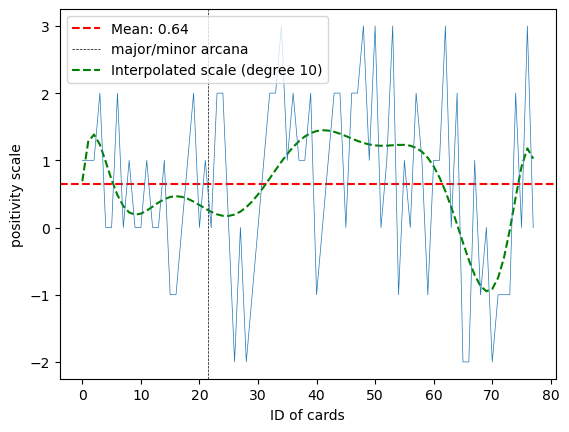

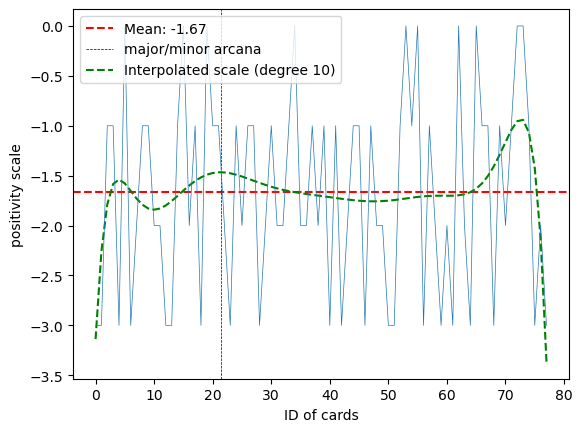

In [180]:
# show positivity aamong cards by id
import matplotlib.pyplot as plt
import numpy as np
from numpy.polynomial.polynomial import Polynomial


X = []
Y = []

for element in card_list:
    X.append(element.card_id)
    Y.append(element.pos)
    
#add mean line
Y_mean = np.mean(Y)
plt.axhline(y=Y_mean, color='r', linestyle='--', label=f"Mean: {Y_mean:.2f}")
plt.axvline(x=21.5, linewidth=0.5, color='black', linestyle='--', label='major/minor arcana')

# add interpolation line
degree = 10
coeffs = np.polyfit(X, Y, degree)
poly_func = np.poly1d(coeffs)
Y_interpolated = poly_func(X)
plt.plot(X, Y_interpolated, color='g', linestyle='--', label=f"Interpolated scale (degree {degree})")
    
plt.xlabel("ID of cards")
plt.ylabel("positivity scale")
plt.legend()

plt.plot(X, Y, linewidth=0.5)
plt.show()


# now same but for reversed
X = []
Y = []

for element in card_list:
    X.append(element.card_id)
    Y.append(element.pos_rev)
    
#add mean line
Y_mean = np.mean(Y)
plt.axhline(y=Y_mean, color='r', linestyle='--', label=f"Mean: {Y_mean:.2f}")
plt.axvline(x=21.5, linewidth=0.5, color='black', linestyle='--', label='major/minor arcana')


# add interpolation line
degree = 10
coeffs = np.polyfit(X, Y, degree)
poly_func = np.poly1d(coeffs)
Y_interpolated = poly_func(X)
plt.plot(X, Y_interpolated, color='g', linestyle='--', label=f"Interpolated scale (degree {degree})")
    
plt.xlabel("ID of cards")
plt.ylabel("positivity scale")
plt.legend() 

plt.plot(X, Y, linewidth=0.5)
plt.show()

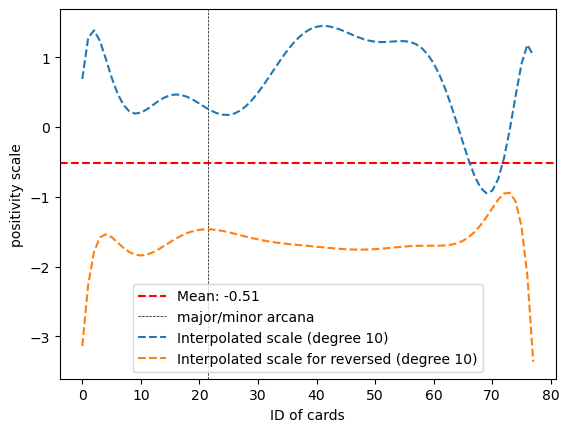

In [178]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.polynomial.polynomial import Polynomial

X = []
Y = []
Y1 = []
Y_all = []

for element in card_list:
    X.append(element.card_id)
    Y.append(element.pos)
    Y1.append(element.pos_rev)
    Y_all.append(element.pos)
    Y_all.append(element.pos_rev)

Y_all_mean = np.mean(Y_all)

plt.axhline(y=Y_all_mean, color='r', linestyle='--', label=f"Mean: {Y_all_mean:.2f}")
plt.axvline(x=21.5, linewidth=0.5, color='black', linestyle='--', label='major/minor arcana')

# add interpolation line for not reversed
degree = 10
coeffs = np.polyfit(X, Y, degree)
poly_func = np.poly1d(coeffs)
Y_interpolated = poly_func(X)
plt.plot(X, Y_interpolated, linestyle='--', label=f"Interpolated scale (degree {degree})")

# add interpolation line for reversed
degree = 10
coeffs = np.polyfit(X, Y1, degree)
poly_func = np.poly1d(coeffs)
Y1_interpolated = poly_func(X)
plt.plot(X, Y1_interpolated, linestyle='--', label=f"Interpolated scale for reversed (degree {degree})")

plt.xlabel("ID of cards")
plt.ylabel("positivity scale")
plt.legend()

plt.show()

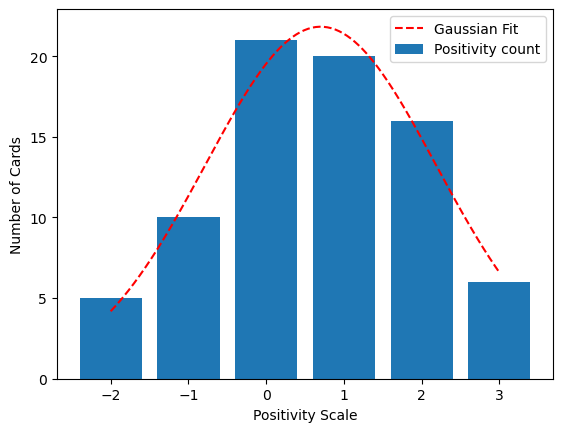

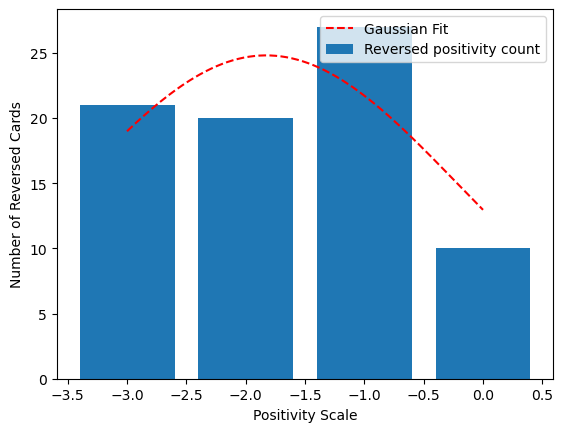

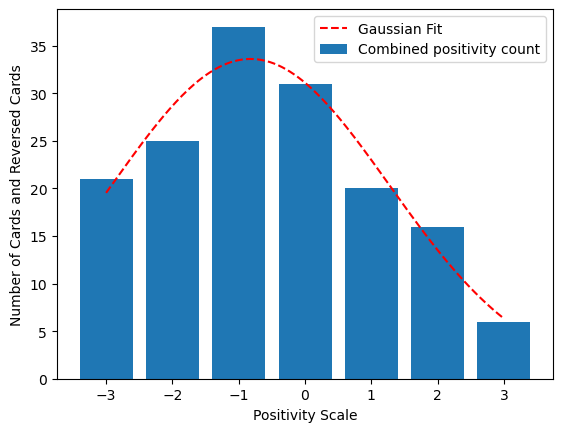

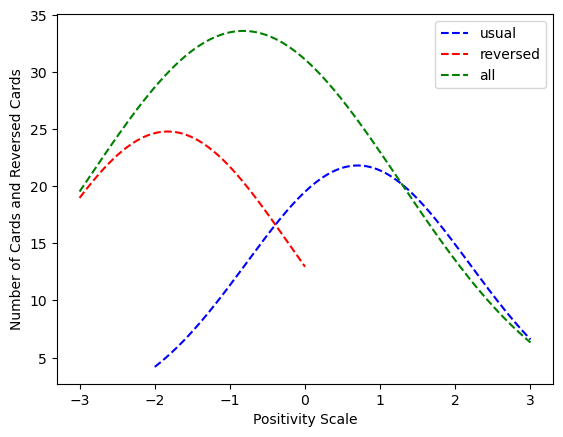

In [215]:
#plot with positivity and number of cards with it
from collections import Counter
from scipy.optimize import curve_fit

values = [obj.pos for obj in card_list]
values1 = [obj.pos_rev for obj in card_list]

value_counts = Counter(values)
value_counts1 = Counter(values1)
value_counts_all = Counter(values1) + Counter(values)

# Extract data for plotting
X = np.array(list(value_counts.keys()))  # Get the unique values (x-axis)
Y = np.array(list(value_counts.values()))  # Get the corresponding counts (y-axis)

# Gaussian
def gaussian(x, amp, mean, sigma):
    return amp * np.exp(-((x - mean) ** 2) / (2 * sigma ** 2))

# Initial parameter estimates (amplitude, mean value, standard deviation)
p0 = [max(Y), np.mean(X), np.std(X)]

popt, _ = curve_fit(gaussian, X, Y, p0=p0)

X_smooth = np.linspace(min(X), max(X), 200)
Y_smooth = gaussian(X_smooth, *popt)

X1 = np.array(list(value_counts1.keys()))
Y1 = np.array(list(value_counts1.values()))

# Gaussian
def gaussian(x, amp, mean, sigma):
    return amp * np.exp(-((x - mean) ** 2) / (2 * sigma ** 2))

# Initial parameter estimates (amplitude, mean value, standard deviation)
p0 = [max(Y1), np.mean(X1), np.std(X1)]

popt, _ = curve_fit(gaussian, X1, Y1, p0=p0)

X1_smooth = np.linspace(min(X1), max(X1), 200)
Y1_smooth = gaussian(X1_smooth, *popt)

X_all = np.array(list(value_counts_all.keys()))
Y_all = np.array(list(value_counts_all.values()))

# Gaussian
def gaussian(x, amp, mean, sigma):
    return amp * np.exp(-((x - mean) ** 2) / (2 * sigma ** 2))

# Initial parameter estimates (amplitude, mean value, standard deviation)
p0 = [max(Y_all), np.mean(X_all), np.std(X_all)]

popt, _ = curve_fit(gaussian, X_all, Y_all, p0=p0)

X_all_smooth = np.linspace(min(X_all), max(X_all), 200)
Y_all_smooth = gaussian(X_all_smooth, *popt)

# plots
# plot for usual
plt.bar(X, Y, alpha=1, label="Positivity count")
plt.plot(X_smooth, Y_smooth, color='r', linestyle='--', label="Gaussian Fit")

plt.xlabel("Positivity Scale")
plt.ylabel("Number of Cards")
plt.legend()
plt.show()

# plot for reversed
plt.bar(X1, Y1, alpha=1, label="Reversed positivity count")
plt.plot(X1_smooth, Y1_smooth, color='r', linestyle='--', label="Gaussian Fit")

plt.xlabel("Positivity Scale")
plt.ylabel("Number of Reversed Cards")
plt.legend()
plt.show()

# plot for all
plt.bar(X_all, Y_all, alpha=1, label="Combined positivity count")
plt.plot(X_all_smooth, Y_all_smooth, color='r', linestyle='--', label="Gaussian Fit")

plt.xlabel("Positivity Scale")
plt.ylabel("Number of Cards and Reversed Cards")
plt.legend()
plt.show()

# plot only for gaussians
plt.plot(X_smooth, Y_smooth, color='b', linestyle='--', label="usual")
plt.plot(X1_smooth, Y1_smooth, color='r', linestyle='--', label="reversed")
plt.plot(X_all_smooth, Y_all_smooth, color='g', linestyle='--', label="all")

plt.xlabel("Positivity Scale")
plt.ylabel("Number of Cards and Reversed Cards")
plt.legend()
plt.show()